In [12]:
import numpy as np 
import h5py
import matplotlib.pyplot as plt

65536


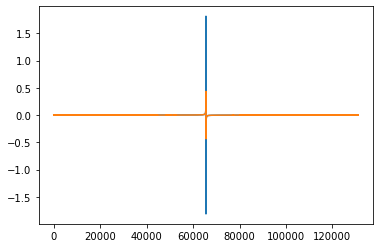

In [16]:
# -------------------------------- local Green's function ----------------------------------------------
#path = 'C:/Users/pworm/Research/HubbardModel/2DSquare_U8_tp-0.25_tpp0.12_beta25_n0.85/from_Motoharu/'
#path = 'D:/Users/pworm/Research/HoleDopedNickelates/2DSquare_U8_tp-0.25_tpp0.12_beta12.5_n0.75/'
path = 'D:/Research/BenchmarkEliashberg/RawDataMotoharu'
beta = 75*4
U    = 2.0*4
n    = 0.85
mu   = 0.217319600136254
giw = np.loadtxt(path + "./gm_wim")
giw = giw[:,1] + 1j * giw[:,2]
g0mand = np.loadtxt(path + "./g0mand")
g0mand = g0mand[:,1] + 1j * g0mand[:,2]
siw =  g0mand - giw ** (-1.0)
siw = np.concatenate((np.flip(np.conj(siw)),siw))
giw = np.concatenate((np.flip(np.conj(giw)),giw))
Niv1 = np.size(giw) // 2
print(Niv1)
f = h5py.File('1p-data.hdf5','w')
f['/dmft-last/ineq-001/giw/value'] = giw[None,None,:] * np.ones((1,2,1))
f['/dmft-last/ineq-001/siw/value'] = siw[None,None,:] * np.ones((1,2,1))
f.create_group('/.config')
f['.config'].attrs['general.beta'] = beta
f['.config'].attrs['atoms.1.udd']   = U
f['.config'].attrs['general.totdens']  = n
f['dmft-last/mu/value']            = mu
f.close()

plt.plot(giw.imag)
plt.plot(siw.imag)

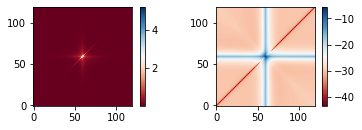

In [17]:
    Nw = 59
    Nv = 60
    iw = Nw
    iwb = (np.arange(-Nw,Nw+1))
    #chi = np.loadtxt(path + '/INPUT-for-DGA/chi_dir/chi{:03}'.format(iw))
    chi = np.loadtxt(path + '/chi_dir/chi{:03}'.format(iw))
    chim = chi[:,7].reshape((2*Nv,2*Nv)) + 1j * chi[:,8].reshape((2*Nv,2*Nv)) - chi[:,9].reshape((2*Nv,2*Nv)) - 1j * chi[:,10].reshape((2*Nv,2*Nv))
    Fm   = chim/beta  + giw[Niv1-Nv:Niv1+Nv,None] * giw[Niv1-Nv-iwb[iw]:Niv1+Nv-iwb[iw],None] * np.eye(2*Nv)
    Fm   = -1.0 * beta * Fm/(giw[Niv1-Nv:Niv1+Nv,None] * giw[Niv1-Nv-iwb[iw]:Niv1+Nv-iwb[iw],None] * giw[None,Niv1-Nv:Niv1+Nv] * giw[None,Niv1-Nv-iwb[iw]:Niv1+Nv-iwb[iw]])
    chim = chim/beta 

    plt.subplot(221)
    plt.imshow(chim.real, cmap = 'RdBu', origin='lower')
    plt.colorbar()
 
    plt.subplot(222)
    plt.imshow(Fm.real, cmap = 'RdBu', origin='lower')
    plt.colorbar()

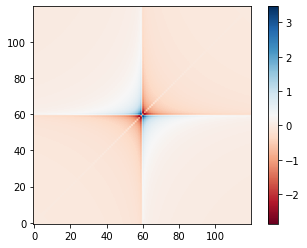

In [18]:
    iwb = (np.arange(-Nw,Nw+1))
    #chi = np.loadtxt(path + '/INPUT-for-DGA/chi_dir/chi{:03}'.format(iw))
    chi = np.loadtxt(path + '/chi_dir/chi{:03}'.format(iw))
    chid = chi[:,7].reshape((2*Nv,2*Nv)) + 1j * chi[:,8].reshape((2*Nv,2*Nv)) + chi[:,9].reshape((2*Nv,2*Nv)) + 1j * chi[:,10].reshape((2*Nv,2*Nv))
    chid = chid/beta + giw[Niv1-Nv:Niv1+Nv,None] * giw[None,Niv1-Nv:Niv1+Nv] #- giw[Niv1-Nv:Niv1+Nv,None] * giw[Niv1-Nv-iwb[iw]:Niv1+Nv-iwb[iw],None] * np.eye(2*Nv)

    plt.imshow(chid.real, cmap = 'RdBu', origin='lower')
    plt.colorbar()

In [20]:
    # ----------------------------- local two-particle Green's function -----------------------------------
    f.close()
    f = h5py.File('g4iw_sym.hdf5','w')
    iwb = (np.arange(-Nw,Nw+1))
    f['/.axes/iwb-g4'] = iwb * 2
    f['/.axes/iwf-g4'] = (np.arange(-Nv,Nv))
    for iw in range(2*Nw+1):
        print(iw)
        chi = np.loadtxt(path + 'chi_dir/chi{:03}'.format(iw))
        chid = chi[:,7].reshape((2*Nv,2*Nv)) + 1j * chi[:,8].reshape((2*Nv,2*Nv)) + chi[:,9].reshape((2*Nv,2*Nv)) + 1j * chi[:,10].reshape((2*Nv,2*Nv))
        chid = chid/beta #- giw[Niv1-Nv:Niv1+Nv,None] * giw[Niv1-Nv-iwb[iw]:Niv1+Nv-iwb[iw],None] * np.eye(2*Nv)
        chim = chi[:,7].reshape((2*Nv,2*Nv)) + 1j * chi[:,8].reshape((2*Nv,2*Nv)) - chi[:,9].reshape((2*Nv,2*Nv)) - 1j * chi[:,10].reshape((2*Nv,2*Nv))
        chim = chim/beta #- giw[Niv1-Nv:Niv1+Nv,None] * giw[Niv1-Nv-iwb[iw]:Niv1+Nv-iwb[iw],None] * np.eye(2*Nv)
        if(iw == Nw):
            f['/ineq-001/dens/{:05}/00001/value'.format(2*Nw-iw)] = chid + 2.0 * giw[Niv1-Nv:Niv1+Nv,None] * giw[None,Niv1-Nv:Niv1+Nv] 
        else:
            f['/ineq-001/dens/{:05}/00001/value'.format(2*Nw-iw)] = chid 
        f['/ineq-001/magn/{:05}/00001/value'.format(2*Nw-iw)] = chim 
    f.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
